### Topic: Clean Energy Vehicle Momentum Study

#### Recording link: https://entuedu-my.sharepoint.com/:v:/g/personal/ytan264_e_ntu_edu_sg/EcLlkuJhodxNjPqd2fqz0h8BQVHTZ3inFPTpQ_mZu2oFwQ?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=aZBsfH 

#### Target audience: Ministry of Transport & Land Transport Authority 

Main agenda/presentation statement: How are consumers and car makers reacting to the government phasing out registration of internal combustion engines by 2030?  

#### Datasets used: 
1) COE.csv (Source: Provided dataset)

2) MVP01-4_MVP_by_fuel.csv (Source: https://datamall.lta.gov.sg/content/datamall/en/static-data.html#Vehicle%20Population)

3) MVP02-2_New_cars_by_make.csv (Source: https://datamall.lta.gov.sg/content/datamall/en/static-data.html#Vehicle%20Population)

#### Context: 
In 2021, the Singapore government released its plan for Singapore’s transition towards Cleaner Energy Vehicles, with a highlight of the plan being that by 2024, 100% of Singaporean vehicles will be running on cleaner energy. 

By 2030, all new car and taxi registrations will be of only cleaner energy models. As Singapore has a 10-year COE ownership period, by 2040, this would ensure the goal of 100% CEVs to be met.

#### Legend:
CEV: Cleaner energy vehicles comprise of all types of electric vehicles (Petrol-Electric (Plug-In), Diesel-Electric (Plug-In), Petro-Electric, Diesel-Electric, Electric) 

ICE: Internal combusiton engines comprise of Petrol & Diesel vehicles


#### Guiding Question 1: 
What is the general trend of CEV over the years? What is the specific market share of cleaner energy vehicles over the years?

<Figure size 1800x1800 with 0 Axes>

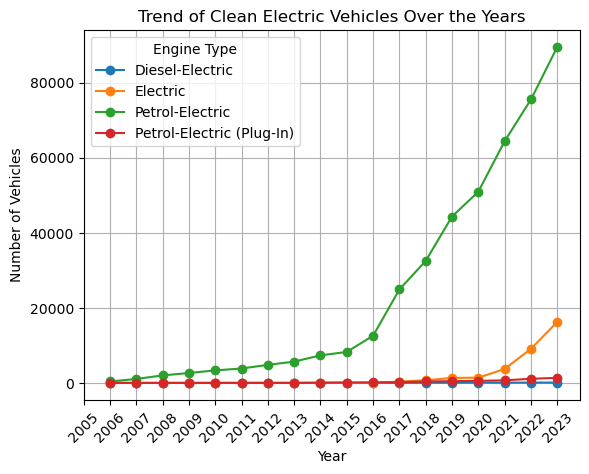

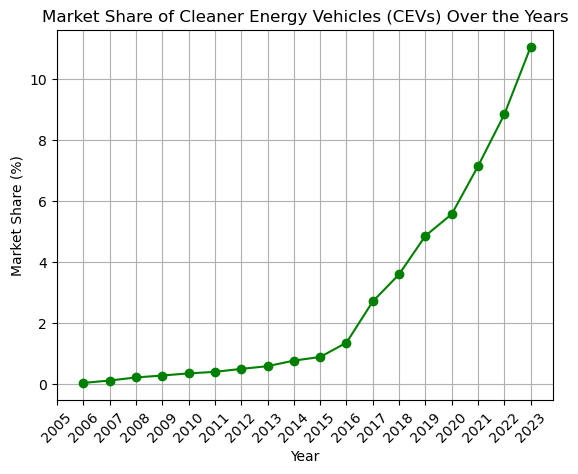

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df_fuel = pd.read_csv("MVP01-4_MVP_by_fuel.csv")

df_fuel.engine.unique() #checking how many engine types there are
cevtypes = ['Petrol-Electric', 'Petrol-Electric (Plug-In)', 'Electric', 'Diesel-Electric'] #listing all CEVs
cevdata = df_fuel[df_fuel['engine'].isin(cevtypes)] #selecting only the rows with CEV
cevgrouped = cevdata.groupby(['year', 'engine']).sum().reset_index() # grouping data by year and engine type the sum
cev_pivot = cevgrouped.pivot(index='year', columns='engine', values='number'); # pivot the table for easier plotting

plt.figure(figsize=(18,18))
cev_pivot.plot(marker='o')
plt.title('Trend of Clean Electric Vehicles Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Engine Type')
plt.xticks(range(2005, int(cev_pivot.index.max())+1))
plt.xticks(rotation=45)  # Rotates labels by 45 degrees
plt.grid(True)
plt.show()

totalvehyearly = df_fuel.groupby("year")["number"].sum()
totalcevyearly = cevdata.groupby('year')['number'].sum()
cevmarketshare = totalcevyearly/totalvehyearly * 100

plt.figure()
plt.plot(cevmarketshare.index, cevmarketshare, marker='o', color='green');
plt.title('Market Share of Cleaner Energy Vehicles (CEVs) Over the Years')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.xticks(range(2005, int(cevmarketshare.index.max())+1))
plt.xticks(rotation=45)  # Rotates labels by 45 degrees
plt.grid(True)
plt.show()


#### Observation 1:
- Diesel-Electric vehicles remains the most popular CEV, with full Electric vehicles coming in second

#### Observation 2: 
- Market Share of CEV has been rising sharply

#### Guiding Question 2: 
How did the market reacted to the news? How receptive is the market to the policy?

{'Electric': array([         nan, -50.        ,   0.        , 400.        ,
        100.        ,  10.        ,   9.09090909, -41.66666667,
        -14.28571429, -33.33333333, 725.        , 957.57575758,
        102.57879656,  88.96746818,   4.56586826, 165.78382248,
        144.89631026,  78.8408666 ]),
 'Diesel-Electric': array([         nan,          nan,          nan,          nan,
                 inf,  50.        ,  66.66666667, 140.        ,
        100.        ,  37.5       ,  -3.03030303,   0.        ,
         59.375     ,  49.01960784,  -1.31578947,   8.        ,
          6.17283951,   6.97674419]),
 'Petrol-Electric': array([         nan, 178.89182058,  89.12015137,  32.11605803,
         26.27792503,  15.23238381,  25.16263336,  18.14968815,
         29.08674996,  12.60905125,  52.13654521,  98.20973902,
         30.5326964 ,  36.37481933,  14.92389221,  26.44271334,
         17.23490433,  18.53067708]),
 'Petrol-Electric (Plug-In)': array([         nan,          nan,    

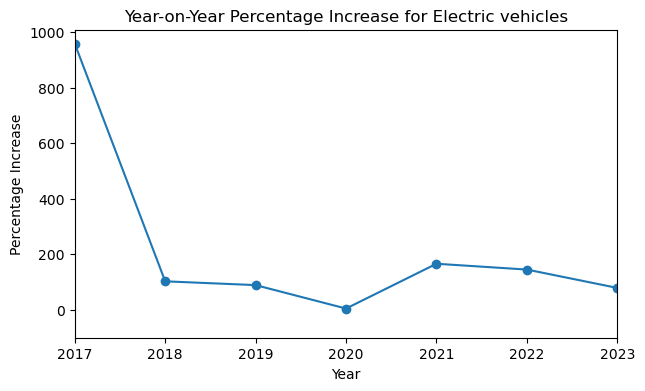

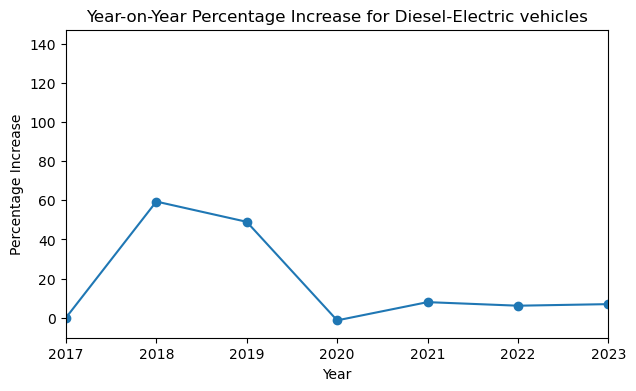

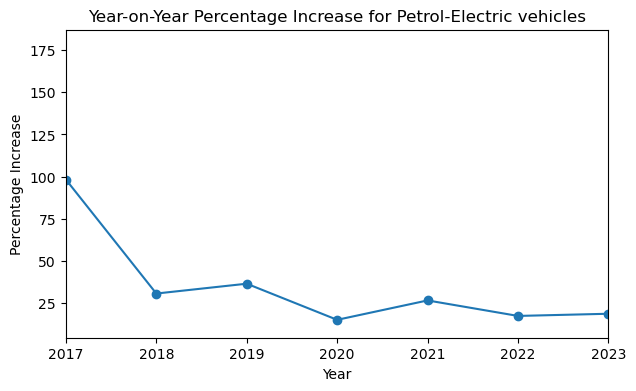

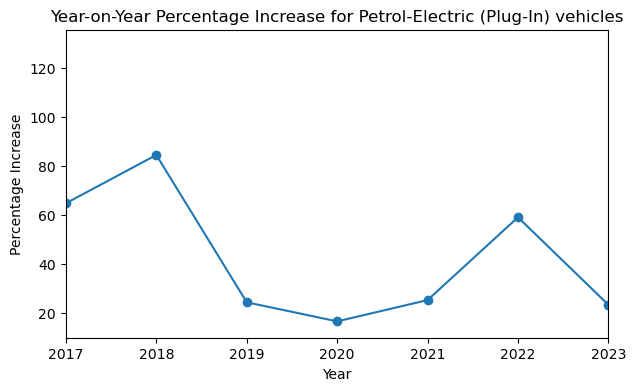

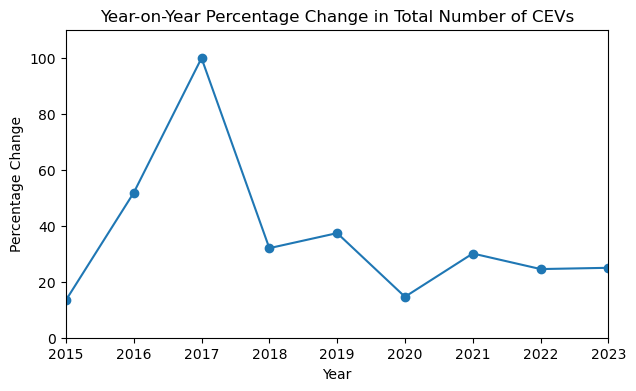

In [8]:
ev_types = ["Electric", "Diesel-Electric", "Petrol-Electric", "Petrol-Electric (Plug-In)"]
x = df_fuel.groupby(["engine", "year"])["number"].sum()
ev = x[ev_types]
#creating a new dataframe ev for only CEVs, grouped by year

percentage_changes = {}
#creating a dictionary to store the exact values 
for each in ev_types:
    change = ev[each].pct_change()*100
#calculating YoY percentage changes in each of the 5 types of CEV 
    percentage_changes[each] = change.values
#adding the values into the dictionary
    plt.figure(figsize=(7, 4))
    plt.plot(change.index, change.values, marker='o')
    plt.title(f'Year-on-Year Percentage Increase for {each} vehicles')
    plt.xlabel('Year')
    plt.ylabel('Percentage Increase')
    plt.xlim(2017, change.index.max())
#setting limits for x-axis
#plotting YoY percentage changes in each of the 5 types of CEV
total_by_year = ev.groupby("year").sum()              
#summing up total CEVs by year

total_changes = total_by_year.pct_change()*100
#calculating YoY percentage changes in total CEV
percentage_changes["Total"] = total_changes.values
#adding the total values into the dictionary

plt.figure(figsize=(7, 4))
plt.plot(total_changes.index, total_changes.values, marker='o')
plt.title('Year-on-Year Percentage Change in Total Number of CEVs')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xlim(2015, change.index.max())
plt.ylim(0,110)
#setting limits for x and y-axes
#plotting YoY percentage changes in total CEV

percentage_changes
#printing out the exact values from the dictionary for analysis


#### Observations:

We generally saw an increase in CEV adoption after the news, with YoY percentage changes increasing in 2021:

In Total:
- From 14.6% (2020) to 30.1% (2021)

Electric Vehicles:
- From 4.6% (2020) to 165.8% (2021)

Diesel-Electric Vehicles
- From -1.3% (2020) to 8.0% (2021)

Diesel-Electric (Plug-In)
- NA, no data

Petrol-Electric Vehicles
- From 14.9% (2020) to 26.4% (2021)

Petrol-Electric (Plug-In)
- 16.7% (2020) to 25.4% (2021)

There has therefore been an increase in adoption of CEVs upon the government’s news release about phasing out ICE vehicles.


#### Guiding Question 3: 
Are demand for CEV more sensitive to COE prices than ICE vehicles?

        month  bidding_no vehicle_class   quota  bids_success bids_received  \
0     2010-01           1    Category A  1152.0        1145.0          1342   
1     2010-01           1    Category B   687.0         679.0           883   
2     2010-01           1    Category C   173.0         173.0           265   
3     2010-01           1    Category D   373.0         365.0           509   
4     2010-01           1    Category E   586.0         567.0          1011   
...       ...         ...           ...     ...           ...           ...   
1645  2023-12           2    Category A   919.0         915.0         1,166   
1646  2023-12           2    Category B   643.0         619.0           847   
1647  2023-12           2    Category C   192.0         189.0           359   
1648  2023-12           2    Category D   546.0         545.0           646   
1649  2023-12           2    Category E   147.0         147.0           228   

       premium  year  
0      18502.0  2010  
1    

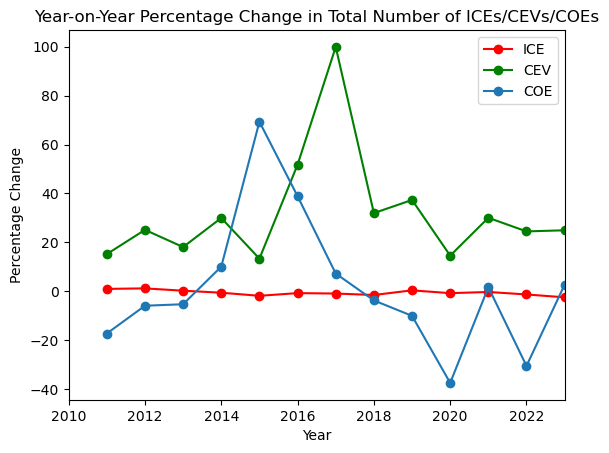

In [9]:
dfcoe = pd.read_csv('COE.csv')
dfvehicles = pd.read_csv('MVP01-4_MVP_by_fuel.csv')

def clean_data(df,median_fill):
    #replace blanks with median for more accurate representation
    for column in median_fill: 
        df[column].fillna(df[column].median(), inplace=True)
    #remove any duplicates
    df.drop_duplicates(inplace = True)
    return df

#extract year from month column and add a new column for that in coe file
dfcoe['year'] = dfcoe['month'].str[:4].astype(int)

#applying it to the files to generate annual coe
coe_columns = ['quota','bids_success','premium']
dfcoe_cleaned = clean_data(dfcoe,coe_columns)
dfcoe_before2024 = dfcoe_cleaned[dfcoe_cleaned.year<=2023]
print(dfcoe_before2024)
annualcoe = dfcoe_before2024.groupby('year').bids_success.sum()
print(annualcoe)

#generate annual number of vehicles
dfvehicles_2010onwards = dfvehicles[dfvehicles.year>=2010]
print(dfvehicles_2010onwards)
annualvehicles=dfvehicles_2010onwards.groupby('year').number.sum()
print(annualvehicles)

#generate annual number of CEVs
dfDieselElectric = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Diesel-Electric"]
dfDieselElectricPlugIn = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Diesel-Electric (Plug-In)"]
dfPetrolElectric = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Petrol-Electric"]
dfPetrolElectricPlugIn = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Petrol-Electric (Plug-In)"]
dfElectric = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Electric"]
dfCEV = pd.concat([dfDieselElectric,dfDieselElectricPlugIn,dfPetrolElectric,dfPetrolElectricPlugIn,dfElectric])
print(dfCEV)
annualCEV = dfCEV.groupby('year').number.sum()
print(annualCEV)

#generate annual number of ICE vehicles
dfPetrol = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Petrol"]
dfDiesel = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Diesel"]
dfPetrolCNG = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="Petrol-CNG"]
dfCNG = dfvehicles_2010onwards[dfvehicles_2010onwards.engine=="CNG"]
dfICE = pd.concat([dfPetrol,dfDiesel,dfPetrolCNG,dfCNG])
print(dfICE)
annualICE = dfICE.groupby('year').number.sum()
print(annualICE)

#plot Year-on-Year Percentage Change in Total Number of ICEs/CEVs/COEs
percentagechangeICE = annualICE.pct_change()*100
percentagechangeCEV = annualCEV.pct_change()*100
percentagechangeCOE = annualcoe.pct_change()*100
print(percentagechangeICE)
print(percentagechangeCEV)
print(percentagechangeCOE)
plt.plot(percentagechangeICE,label = 'ICE',color='red',marker='o')
plt.plot(percentagechangeCEV,label ='CEV',color='green',marker='o')
plt.plot(percentagechangeCOE,label ='COE',marker='o')
plt.xlim(2010,2023)
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Year-on-Year Percentage Change in Total Number of ICEs/CEVs/COEs')
plt.legend()


#### Observation 1: 
The year-on-year percentage change in total number of CEVs is strongly correlated to the number of COEs distributed

#### Observation 2: 
The growth rate of ICE vehicles remains close to zero regardless of how the number of COEs changes

#### Actionable Insight:
The government could consider distributing more COEs, this actionable insight should be carried out with Guiding Question 5. This could enable us to increase the growth rate of CEVs while ensuring that the number of ICE vehicles does not rise sharply. 

#### Guiding Question 4: 
What is the ratio of ICE vs CEV vehicles across the top 10 car brands in 2022 and 2023? 

C:\Users\Jordan\AppData\Local\Temp\ipykernel_12240\706160663.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['fuel_type'] = df_22['fuel'].apply(fuel_check)


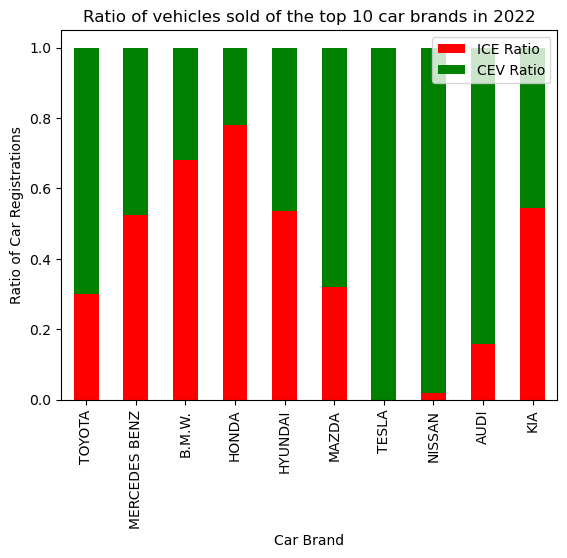

C:\Users\Jordan\AppData\Local\Temp\ipykernel_12240\706160663.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23['fuel_type'] = df_23['fuel'].apply(fuel_check)


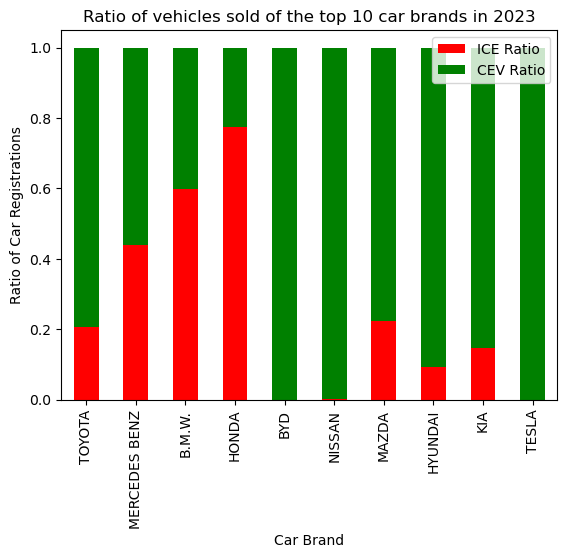

In [10]:
#import libraries required
import pandas as pd
import matplotlib.pyplot as plt

#import datafile
df_newcars = pd.read_csv('MVP02-2_New_Cars_by_make_type.csv')

#Combine CEV and loop through the type data and determine whether it falls under CEV or not
#Define CEV as all electric and electric type of vehicle --> Petrol-Electric = CEV, Diesel-Electric = CEV
cev = ['Petrol-Electric (Plug-In)', 'Petrol-Electric', 'Electric', 'Diesel-Electric', 'Diesel-Electric (Plug-In)']

def fuel_check(fuel):
    if fuel in cev:
        return 'CEV'
    else:
        return 'ICE'
    
#analysis for year 2022
df_22 = df_newcars[df_newcars['year']==2022]
df_22['fuel_type'] = df_22['fuel'].apply(fuel_check) 

#group by brand('make') and fuel category, then find the total
group_22 = df_22.groupby(['make','fuel_type'])['number'].sum( )
group_22 = group_22.unstack(fill_value = 0)

#sum total
group_22['Total'] = group_22.sum(axis=1)

#find top 10 car brands and sort by highest first
car_10 = group_22.sort_values(by='Total',ascending = False).head(10)

#calculate ratio of ICE vs clean energy vehicle
car_10['ICE Ratio'] = car_10['ICE']/car_10['Total']
car_10['CEV Ratio'] = car_10['CEV']/car_10['Total']

#plot it with a stacked bar chart
bar = car_10[['ICE Ratio','CEV Ratio']].plot(kind='bar',stacked = True,color=['red','green'],title = 'Ratio of vehicles sold of the top 10 car brands in 2022',legend = True)
bar.set_xlabel('Car Brand')
bar.set_ylabel('Ratio of Car Registrations')
bar.legend(loc = 'upper right')
plt.xticks(rotation=90)
plt.show()

#repeat the same thing but change to 2023

#import libraries required
import pandas as pd
import matplotlib.pyplot as plt

#import datafile
df_newcars = pd.read_csv('MVP02-2_New_Cars_by_make_type.csv')

#Combine CEV and loop through the type data and determine whether it falls under CEV or not
#Define CEV as all electric and electric type of vehicle --> Petrol-Electric = CEV, Diesel-Electric = CEV
cev = ['Petrol-Electric (Plug-In)', 'Petrol-Electric', 'Electric', 'Diesel-Electric', 'Diesel-Electric (Plug-In)']

def fuel_check(fuel):
    if fuel in cev:
        return 'CEV'
    else:
        return 'ICE'
    
#analysis for year 2023
df_23 = df_newcars[df_newcars['year']==2023]
df_23['fuel_type'] = df_23['fuel'].apply(fuel_check)

#group by brand('make') and fuel category, then find the total
group_23 = df_23.groupby(['make','fuel_type'])['number'].sum( )
group_23 = group_23.unstack(fill_value = 0)

#sum total
group_23['Total'] = group_23.sum(axis=1)

#find top 10 car brands and sort by highest first
car_10 = group_23.sort_values(by='Total',ascending = False).head(10)

#calculate ratio of ICE vs clean energy vehicle
car_10['ICE Ratio'] = car_10['ICE']/car_10['Total']
car_10['CEV Ratio'] = car_10['CEV']/car_10['Total']

#plot it with a stacked bar chart
bar = car_10[['ICE Ratio','CEV Ratio']].plot(kind='bar',stacked = True,color=['red','green'],title = 'Ratio of vehicles sold of the top 10 car brands in 2023',legend = True)
bar.set_xlabel('Car Brand')
bar.set_ylabel('Ratio of Car Registrations')
bar.legend(loc = 'upper right')
plt.xticks(rotation=90)
plt.show()


#### Observation 1:
Top 4 car brands (Toyota, Benz, BMW, and Honda) remained on the ranking and in the same position from 2022 to 2023 signals strong demand for their cars. Entrance of BYD and Nissan transitioning to full CEV on top of Tesla shows that the car makers are receptive of the policy and BYD jumping to top 5 in 2023 shows car buyers are receptive too.

#### Observation 2:
Across the board ICE to CEV ratio are decreasing for all car brands with the exception of Honda. 

#### Actionable Insight:
We recommend incentivising the top 4 car brands that have higher ICE to CEV ratio through a tiered tax incentive system. The decision to incentivise the higher ICE to CEV ratio brands in top 4 is intentional as we think this is more beneficial for the market to acheive full CEV ratio by 2030 since the remaining brands 

#### Guiding Question 5: 
What is the impact of COE quota on CEVs?

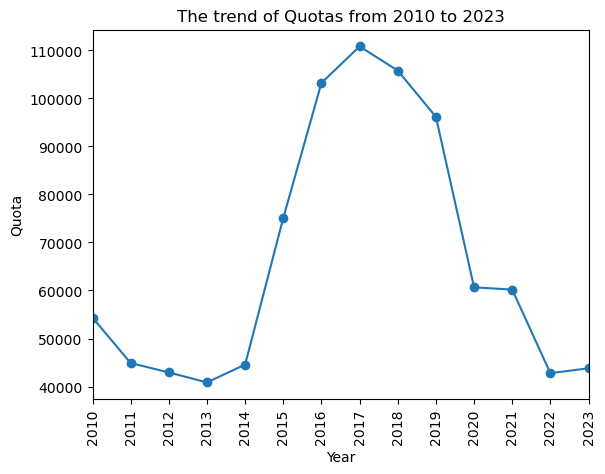

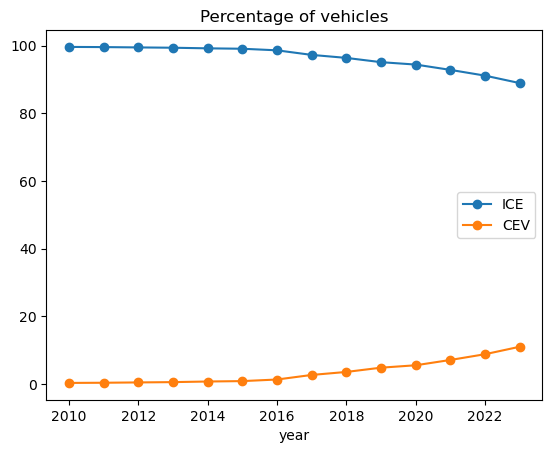

In [11]:
#read file
import pandas as pd
import matplotlib.pyplot as plt
dfcoe = pd.read_csv("COE.csv")

#clean file for dupes and fill NaNs
dfcoe.duplicated().sum() #no duplicates
dfcoe.fillna(0, inplace = True) #fill all NaN columns with 0 altering original df
dfcoe.isna().sum() #check no more NaN

#make new column with just Year
dfcoe["Year"] = dfcoe['month'].str.split("-").str[0] 

#group by year
df1 = dfcoe.groupby(["Year"]).sum().reset_index()
df1_2023 = df1[df1["Year"].astype(int) < 2024] #since 2024 data is not useful

#plot graph
plt.plot(df1_2023['Year'], df1_2023['quota'], marker='o', linestyle='-')
# Add labels and title
plt.xlabel('Year')
plt.xlim(df1_2023['Year'].min(), df1_2023['Year'].max())
#plt.xticks(range(df1_2023['Year'].min(), df1_2023['Year'].max() + 1, 2)) 
plt.ylabel('Quota')
plt.title('The trend of Quotas from 2010 to 2023')
plt.xticks(rotation=90)
# Show plot
plt.show()


#plot percentage of ICE and CEVs against year
percentageICE=annualICE/annualvehicles*100
percentageCEV=annualCEV/annualvehicles*100
percentageICE.plot(kind='line',x='year',y='number',title='Percentage of vehicles',label='ICE',marker='o');
percentageCEV.plot(kind='line',x='year',y='number',title='Percentage of vehicles',label='CEV',marker='o');
plt.legend()



#### Observation: 
Total percentage of ICE adoption in the market has been decreasing amidst fluctuating quota from 2010 to 2023, yet the total percentage of CEV adoption rate has been steadily increasing.

#### Actionable Insight:
COE should be differentiated and favored for CEV. Our recommendation is to split COE quotas into CEV and ICE quotas.

### Conclusion:
To split COE quotas consisting of percentages of ICE and CEV, so as to facilitate the growth of CEV and a smooth transition into the phasing out of ICE registrations by 2030.

- The government can split the COE quota into percentages reserved for both CEV and ICE

- The percentage of ICE will gradually decrease over the years, while that of CEV increases

- Providing tax incentives for currently higher ICE to CEV ratio car brands to facilitate the transition to full CEV 

- By 2030, the percentage of ICE in the COE quota would be 0%, while that of CEV would be 100%

- This facilitates a smooth transition into the intended phasing out of ICE registrations by 2030